In [7]:
import pandas as pd
TF_to_gene = pd.read_csv("NetWorkTFGene.txt", delimiter="\t", comment="#")
TF_to_gene

,1)regulatorId,2)regulatorName,3)RegulatorGeneName,4)regulatedId,5)regulatedName,6)function,7)confidenceLevel
0,ECK120011186,Fis,fis,ECK120000028,adhE,+,Strong
1,ECK120011186,Fis,fis,ECK120000040,osmE,-,Strong
2,ECK120011186,Fis,fis,ECK120000042,ansB,-,Weak
3,ECK120011186,Fis,fis,ECK120000043,apaG,+,Weak
4,ECK120011186,Fis,fis,ECK120000044,apaH,+,Weak
...,...,...,...,...,...,...,...
6055,ECK125336166,RpoN,rpoN,ECK120000323,mutM,-,Strong
6056,ECK125336166,RpoN,rpoN,ECK120000655,nth,-,Strong
6057,ECK125336166,RpoN,rpoN,ECK120002092,cspC,-,Weak
6058,ECK125336166,RpoN,rpoN,ECK120003587,yobF,-,Strong


In [8]:
PATH = "rijs_2011_all_data.csv"
all_data = pd.read_csv(PATH, index_col="target_gene", encoding="utf-8")
all_data

,glucose_uptake,growth_rate,acetate_secretion,pts,zwf,gnd,pgi,edd_eda,pfk_fba,tktA,...,glta_can,icd,suc,sdh_fum,mdh,mae,pck,pcc,pta_acka,acea_aceb
target_gene,,,,,,,,,,,,,,,,,,,,,
AlsR,8.11,0.54,3.92,7.14,1.93,1.55,5.19,0.39,5.90,0.50,...,2.33,2.33,1.48,1.48,1.02,0.46,0.36,2.61,4.04,0.0
AppY,7.74,0.55,4.76,7.41,2.45,1.43,4.94,1.02,5.58,0.46,...,1.91,1.91,1.07,1.07,0.61,0.46,0.18,2.41,5.09,0.0
ArcA,7.30,0.56,3.19,7.14,1.79,1.27,5.31,0.53,5.83,0.40,...,2.72,2.72,1.86,1.86,1.51,0.35,0.24,2.42,3.55,0.0
ArcB,7.36,0.56,4.39,7.30,1.94,1.60,5.33,0.34,6.08,0.51,...,2.30,2.30,1.46,1.46,1.40,0.06,0.51,2.34,4.37,0.0
ArgR,6.87,0.46,4.64,6.77,2.29,1.30,4.45,0.99,5.05,0.42,...,1.87,1.87,1.14,1.14,0.58,0.56,0.23,2.33,4.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RseA,6.29,0.53,5.31,6.53,1.84,1.26,4.67,0.57,5.24,0.41,...,1.55,1.55,0.84,0.84,0.56,0.28,0.22,2.02,4.78,0.0
RseB,6.22,0.54,4.51,6.69,2.08,1.28,4.59,0.80,5.14,0.41,...,1.63,1.63,0.84,0.84,0.56,0.29,0.22,2.17,4.38,0.0
Pgi,4.01,0.32,1.51,3.77,3.61,3.09,0.15,0.52,2.02,1.02,...,0.76,0.76,0.26,0.26,0.26,0.00,0.48,1.56,1.23,0.0


In [25]:
import cobra
DIRECTORY = './'
cobraname = 'iML1515'
cobrafile = DIRECTORY+cobraname+'.xml'
cobra_model = cobra.io.read_sbml_model(cobrafile)

In [30]:
genes_names_cobra_model = [x.name for x in cobra_model.genes]

In [46]:
target_genes_candidates = []
corresponding_nbr_involved_reactions = []

for regulator_gene in all_data.index:
    subset = TF_to_gene.loc[TF_to_gene['2)regulatorName'] == regulator_gene]
    nbr_target_genes = len(subset)
    if nbr_target_genes > 0:
        list_regulated_genes = subset["5)regulatedName"].values
        print("According to RegulonDB, " + regulator_gene + " regulates:\n", list_regulated_genes)
        target_genes_candidates.append(regulator_gene)
        nbr_involved_reactions = 0
        for regulated_gene in list_regulated_genes:
            if regulated_gene in genes_names_cobra_model:
                print("The regulator " + regulator_gene + " targets the " + regulated_gene + " gene in the cobra model.")
                involved_reactions = cobra_model.genes[genes_names_cobra_model.index(regulated_gene)].reactions
                print([reac.name for reac in involved_reactions])
                nbr_involved_reactions += len(involved_reactions)
        corresponding_nbr_involved_reactions.append(nbr_involved_reactions)

    else:
        print(regulator_gene + " regulator has no target gene in regulonDB")
        if regulator_gene in genes_names_cobra_model:
                print("The regulator " + regulator_gene + " is directly present as the " + regulated_gene + " gene in the cobra model.")
                involved_reactions = cobra_model.genes[genes_names_cobra_model.index(regulated_gene)].reactions
                print([reac.name for reac in involved_reactions])

    print("\n\n")


According to RegulonDB, AlsR regulates:
 ['rpiB' 'alsE' 'alsC' 'alsA' 'alsB' 'alsR']
The regulator AlsR targets the rpiB gene in the cobra model.
['Ribose-5-phosphate isomerase', 'Allose 6-phosphate isomerase']
The regulator AlsR targets the alsE gene in the cobra model.
['Allulose 6-phosphate epimerase']
The regulator AlsR targets the alsC gene in the cobra model.
['D-ribose transport via ABC system (periplasm)', 'D-allose transport via ABC system (periplasm)']
The regulator AlsR targets the alsA gene in the cobra model.
['D-ribose transport via ABC system (periplasm)', 'D-allose transport via ABC system (periplasm)']
The regulator AlsR targets the alsB gene in the cobra model.
['D-ribose transport via ABC system (periplasm)', 'D-allose transport via ABC system (periplasm)']



According to RegulonDB, AppY regulates:
 ['appA' 'hyaA' 'hyaB' 'hyaC' 'hyaD' 'hyaE' 'hyaF' 'appB' 'appC' 'appX']
The regulator AppY targets the appA gene in the cobra model.
['Nucleoside-triphosphatase (GTP) (p

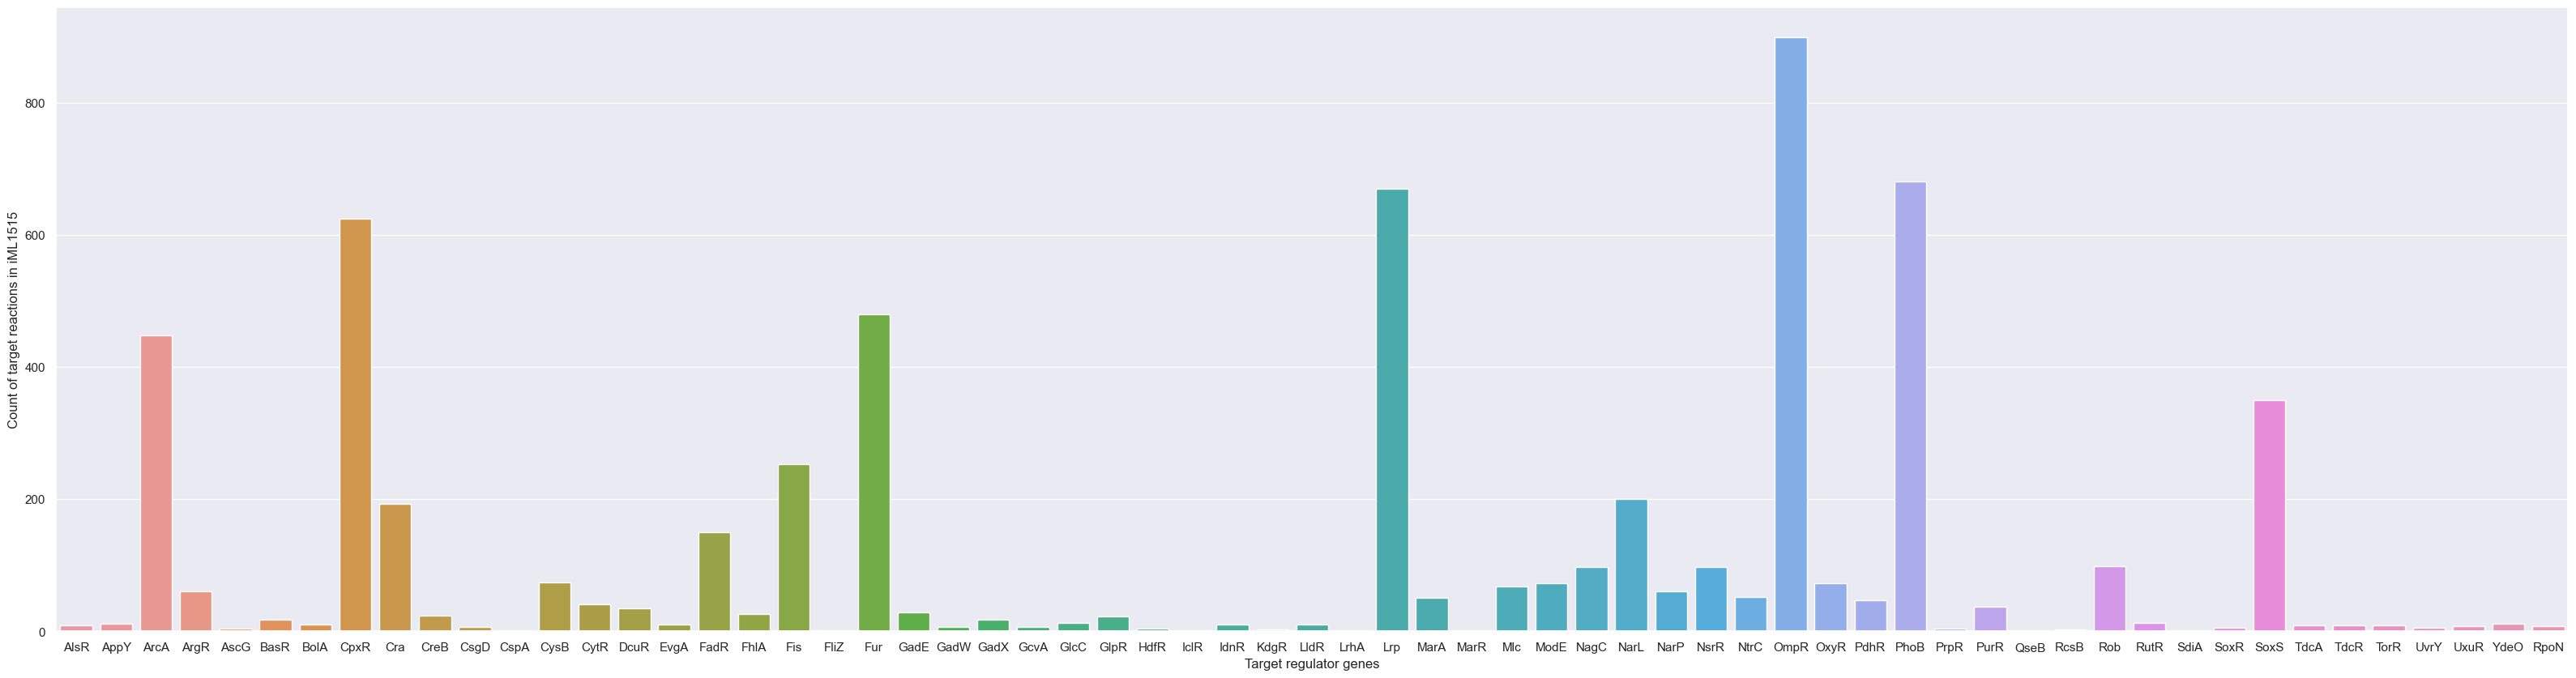

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.close('all')
fig, ax = plt.subplots(figsize=(40,10))
sns.barplot(x=target_genes_candidates, y=corresponding_nbr_involved_reactions)
plt.xlabel("Target regulator genes")
plt.ylabel("Count of target reactions in iML1515")
sns.set_theme()
plt.show()